<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Naive_Bayes_and_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

## Overview

### In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

## Dataset

The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:

•	Text: The content of the blog post. Column name: Data

•	Category: The category to which the blog post belongs. Column name: Labels


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import string
import spacy
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load the dataset
df = pd.read_csv('/content/blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [ ]:
# shape of dataset
df.shape

(19997, 3)

In [ ]:
# see the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [ ]:
# checking any null values
df.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

In [ ]:
# checking any duplicated values
df.duplicated().sum()

0

In [ ]:
!pip install vaderSentiment

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Split Data
X = df['Data']  # Features (blog post text)
y = df['Labels']  # Target (blog post category)

# Split the data into train and test datas

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Model

In [ ]:
# Tokenization and vectorization can be done using CountVectorizer
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

## Predict the categories of test data

In [ ]:
# Predict the categories of test data
y_pred = nb_classifier.predict(X_test_vec)

## Checking the  precision,   recall,  f1-score,   support

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8655
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.79      0.79       173
           comp.graphics       0.67      0.91      0.77       179
 comp.os.ms-windows.misc       0.97      0.31      0.47       226
comp.sys.ibm.pc.hardware       0.69      0.83      0.75       204
   comp.sys.mac.hardware       0.85      0.94      0.90       205
          comp.windows.x       0.78      0.91      0.84       186
            misc.forsale       0.90      0.83      0.86       190
               rec.autos       0.88      0.95      0.91       203
         rec.motorcycles       0.99      0.93      0.96       218
      rec.sport.baseball       0.99      0.94      0.97       192
        rec.sport.hockey       0.98      0.97      0.97       203
               sci.crypt       0.94      0.97      0.96       200
         sci.electronics       0.92      0.89      0.90       227
                 sci.med       0.99

### there is model accuracy is 0.8655 that's more than 0.85 accuracy therefor our model is good.

# Visualize the Category distribution

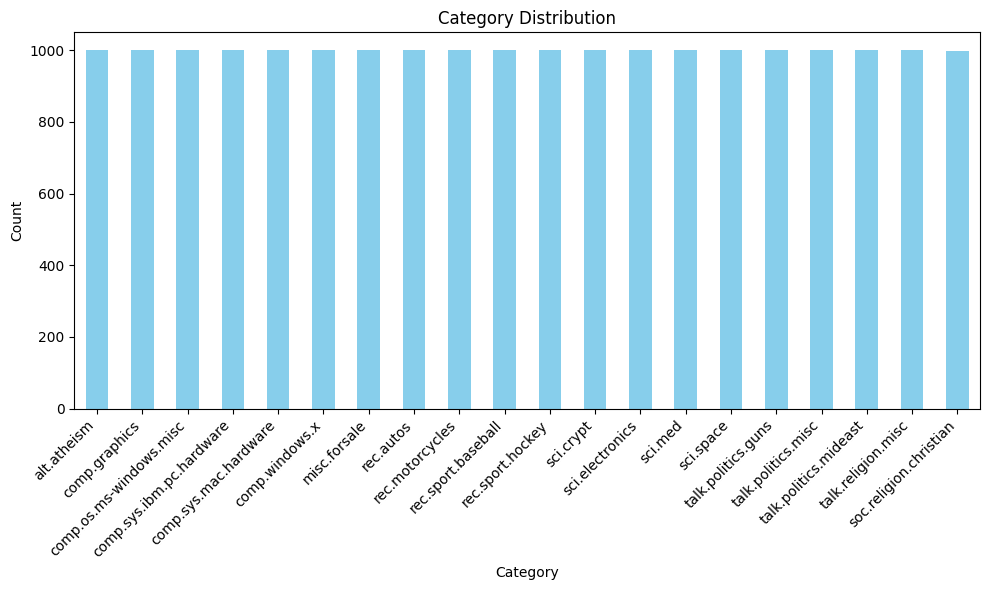

In [ ]:
# Count the occurrences of each category
category_counts = df['Labels'].value_counts()

# Plotting the category distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


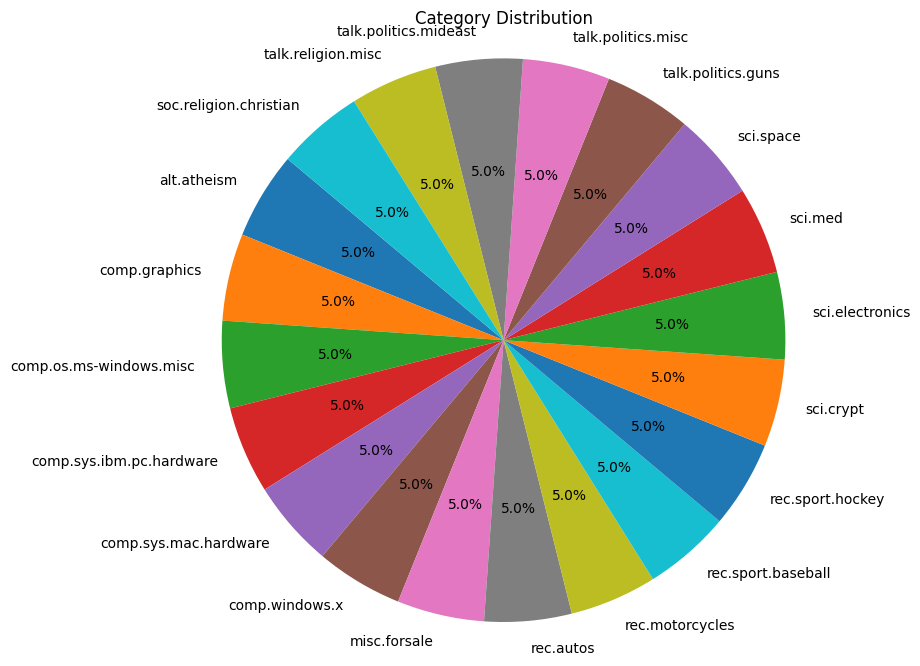

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Sentiment Analysis

In [ ]:
# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Function to get sentiment score
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
# Apply sentiment analysis to each blog post
df['Sentiment'] = df['Data'].apply(get_sentiment_score)

In [ ]:
# Display results
print("Sentiment Analysis Results:")
print(df[['Data', 'Sentiment']].head())

Sentiment Analysis Results:
                                                Data Sentiment
0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  Positive
1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Negative


# Visualize the sentimal data

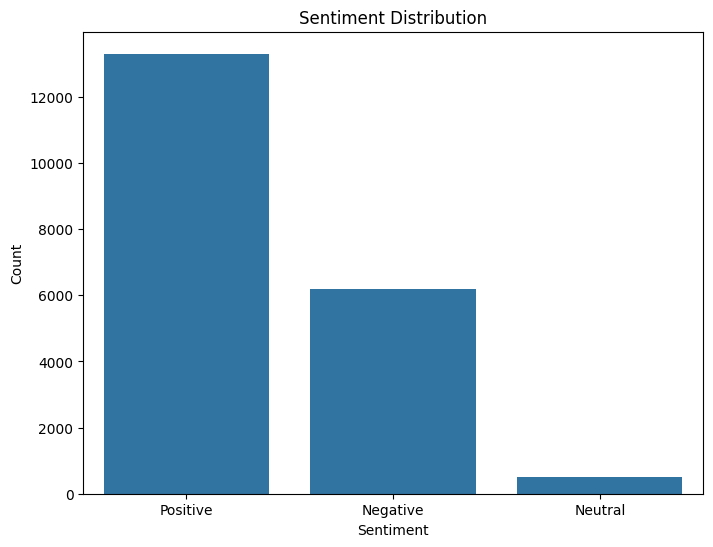

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Conclusion

### In this assignment, We worked on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes and our task is to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately and we have complete the task.

### Here the model accuracy is 0.8655. this is pretty good.

### Here is sentimental distribution and our model have positive, negative and neutral.